In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

In [2]:
df = pd.read_csv("AI_heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,M,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53.0,M,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70.0,M,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61.0,M,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62.0,F,0,138,294,1,1,106,0,1.9,1,3,2,0


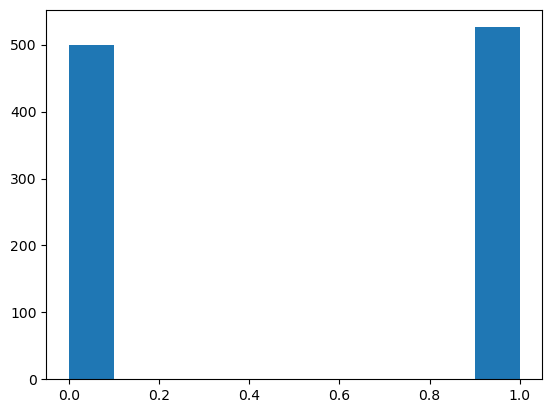

In [7]:
plt.hist(df['target'])
plt.show()

In [8]:
# Data is not imbalanced

In [10]:
corr_matrix = df.corr()
corr_matrix

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.081711,0.265283,0.217452,0.113552,-0.135061,-0.398372,0.086225,0.196630,-0.168715,0.262819,0.060679,-0.222158
cp,-0.081711,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.265283,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.217452,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.113552,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.135061,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.398372,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.086225,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.196630,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441
slope,-0.168715,0.131633,-0.120445,-0.014248,-0.061902,0.086086,0.395308,-0.267335,-0.575189,1.000000,-0.073440,-0.094090,0.345512


In [11]:
df.isna().sum()

age         102
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

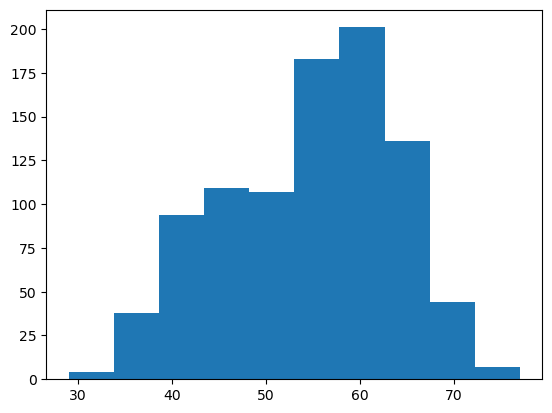

In [14]:
plt.hist(df['age'],bins=10)
plt.show()

In [16]:
df['age'].mean()

54.522210184182015

In [17]:
# The maximum patients lie between 50-65, so I will fill the missing values with mean

In [23]:
df['age'] = df['age'].fillna(df['age'].mean())

In [24]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,M,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53.0,M,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70.0,M,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61.0,M,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62.0,F,0,138,294,1,1,106,0,1.9,1,3,2,0


In [28]:
df['sex'].unique()

array(['M', 'F'], dtype=object)

In [31]:
# Replace Male with 0 and Female with 1

In [29]:
df['sex'] = df['sex'].replace('M',0)
df['sex'] = df['sex'].replace('F',1)

In [30]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,0,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53.0,0,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70.0,0,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61.0,0,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62.0,1,0,138,294,1,1,106,0,1.9,1,3,2,0


In [32]:
df['sex'].unique()

array([0, 1])

In [40]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.00000,0,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53.00000,0,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70.00000,0,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61.00000,0,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62.00000,1,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.00000,0,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60.00000,0,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47.00000,0,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50.00000,1,0,110,254,0,0,159,0,0.0,2,0,2,1


In [42]:
# In co-relation matrix, no two features had any close relation, noone was more the 0.8, so everyone is contributing
# in the dataset

In [44]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,0,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53.0,0,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70.0,0,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61.0,0,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62.0,1,0,138,294,1,1,106,0,1.9,1,3,2,0


In [54]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,0.102784,-0.077598,0.254872,0.201472,0.106852,-0.127490,-0.376334,0.081909,0.188428,-0.160123,0.252277,0.057229,-0.210822
sex,0.102784,1.000000,0.041119,0.078974,0.198258,-0.027200,0.055117,0.049365,-0.139157,-0.084687,0.026666,-0.111729,-0.198424,0.279501
cp,-0.077598,0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.254872,0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.201472,0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.106852,-0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.127490,0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.376334,0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.081909,-0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.188428,-0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


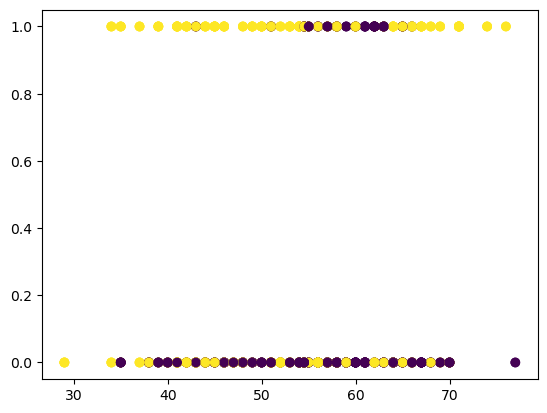

In [56]:
plt.scatter(df['age'],df['sex'],c=df['target'])
plt.show()

In [46]:
temp = df[df['age']<30]
temp

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
60,29.0,0,1,130,204,0,0,202,0,0.0,2,0,2,1
64,29.0,0,1,130,204,0,0,202,0,0.0,2,0,2,1
118,29.0,0,1,130,204,0,0,202,0,0.0,2,0,2,1
668,29.0,0,1,130,204,0,0,202,0,0.0,2,0,2,1


In [47]:
# So we can see yellow means that patient have cancer.Females are more likely to have cancers

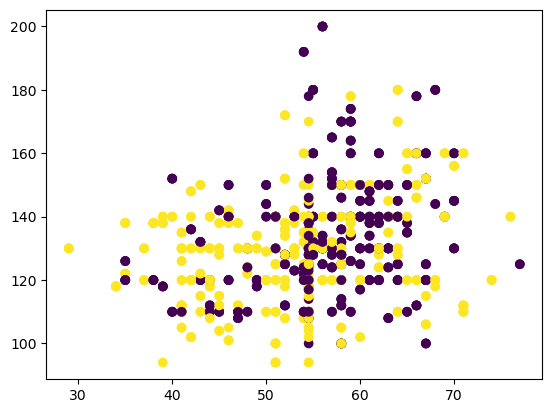

In [55]:
plt.scatter(df['age'],df['trestbps'],c=df['target'])

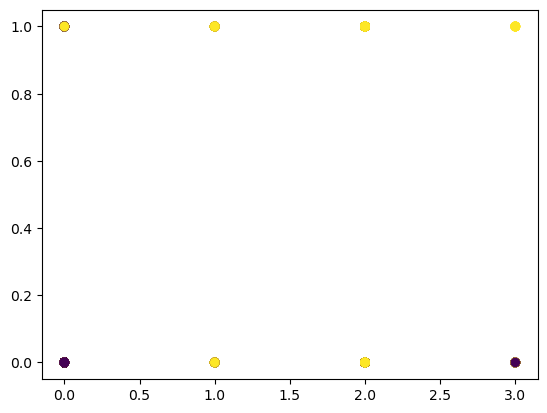

In [53]:
plt.scatter(df['cp'],df['sex'],c=df['target'])
plt.show()

In [60]:
y = df['target']
X = df.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [64]:
clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       161
           1       0.80      0.89      0.84       147

    accuracy                           0.84       308
   macro avg       0.84      0.84      0.84       308
weighted avg       0.85      0.84      0.84       308

Accuracy: 0.8409090909090909


/home/h/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [66]:
clf = MLPClassifier(hidden_layer_sizes=(100,100 ), activation='relu', solver='sgd', max_iter=100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.28      0.42       161
           1       0.54      0.94      0.69       147

    accuracy                           0.59       308
   macro avg       0.69      0.61      0.55       308
weighted avg       0.69      0.59      0.55       308

Accuracy: 0.5941558441558441


/home/h/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [74]:
clf = MLPClassifier(hidden_layer_sizes=(10,10 ), activation='relu', solver='adam', max_iter=500)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       161
           1       0.78      0.89      0.83       147

    accuracy                           0.83       308
   macro avg       0.84      0.83      0.83       308
weighted avg       0.84      0.83      0.83       308

Accuracy: 0.8311688311688312


In [77]:
clf = MLPClassifier(hidden_layer_sizes=(20,10,10 ), activation='relu', solver='adam', max_iter=500)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       161
           1       0.79      0.89      0.84       147

    accuracy                           0.83       308
   macro avg       0.84      0.84      0.83       308
weighted avg       0.84      0.83      0.83       308

Accuracy: 0.8344155844155844


In [78]:
clf = MLPClassifier(hidden_layer_sizes=(20,10,10 ), activation='relu', solver='sgd', max_iter=500)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       161
           1       0.70      0.73      0.72       147

    accuracy                           0.72       308
   macro avg       0.72      0.72      0.72       308
weighted avg       0.73      0.72      0.72       308

Accuracy: 0.724025974025974


In [83]:
clf = MLPClassifier(hidden_layer_sizes=(20,10 ), activation='relu', solver='sgd', max_iter=500)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      1.00      0.69       161
           1       0.00      0.00      0.00       147

    accuracy                           0.52       308
   macro avg       0.26      0.50      0.34       308
weighted avg       0.27      0.52      0.36       308

Accuracy: 0.5227272727272727


/home/h/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/h/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/h/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
# adam is always giving more accuracy

In [82]:
clf = MLPClassifier(hidden_layer_sizes=(20,10 ), activation='relu', solver='adam', max_iter=500)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       161
           1       0.82      0.87      0.84       147

    accuracy                           0.84       308
   macro avg       0.84      0.85      0.84       308
weighted avg       0.85      0.84      0.84       308

Accuracy: 0.8441558441558441


In [88]:
clf = MLPClassifier(hidden_layer_sizes=(25,10 ), activation='relu', solver='adam', max_iter=500)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80       161
           1       0.75      0.87      0.81       147

    accuracy                           0.80       308
   macro avg       0.81      0.80      0.80       308
weighted avg       0.81      0.80      0.80       308

Accuracy: 0.801948051948052


In [89]:
clf = MLPClassifier(solver="lbfgs",hidden_layer_sizes = (20,20),random_state = 1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       161
           1       0.77      0.84      0.80       147

    accuracy                           0.80       308
   macro avg       0.80      0.80      0.80       308
weighted avg       0.80      0.80      0.80       308

Accuracy: 0.801948051948052


/home/h/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [92]:
clf = MLPClassifier(hidden_layer_sizes=(20,20 ), activation='relu', solver='adam', max_iter=500)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       161
           1       0.85      0.75      0.80       147

    accuracy                           0.82       308
   macro avg       0.82      0.82      0.82       308
weighted avg       0.82      0.82      0.82       308

Accuracy: 0.8181818181818182


In [93]:
clf = MLPClassifier(hidden_layer_sizes=(50,50 ), activation='relu', solver='adam', max_iter=500)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       161
           1       0.82      0.86      0.84       147

    accuracy                           0.84       308
   macro avg       0.84      0.85      0.84       308
weighted avg       0.85      0.84      0.84       308

Accuracy: 0.8441558441558441


In [94]:
clf = MLPClassifier(hidden_layer_sizes=(100,100 ), activation='relu', solver='adam', max_iter=500)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       161
           1       0.86      0.71      0.78       147

    accuracy                           0.81       308
   macro avg       0.81      0.80      0.80       308
weighted avg       0.81      0.81      0.80       308

Accuracy: 0.8051948051948052


In [98]:
clf = MLPClassifier(hidden_layer_sizes=(50,50 ), activation='relu', solver='adam', max_iter=500)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       161
           1       0.79      0.89      0.84       147

    accuracy                           0.83       308
   macro avg       0.84      0.84      0.83       308
weighted avg       0.84      0.83      0.83       308

Accuracy: 0.8344155844155844


In [99]:
# Accuracy at most is 0.84

# Observation

This dataset is small and is not very good to train the whole model.
We need more data to get more accurate results